# Draw the graph using the iGraph package.

In [46]:
#import the important packages
import igraph as ig
import matplotlib.pyplot as plt

In [47]:
g = ig.Graph(9,[(1,5),(8,2),(7,1),(3,6),(5,9),(4,2),(2,5),(6,3),(9,2),(1,5),(8,4),(7,1),(3,6),(5,7),(4,2),(2,8),(6,9),(9,7)])


#To find the shortest path or distance between two nodes
results = g.get_shortest_paths(1, to=9,output = "vpath")
results

[[1, 5, 9]]

In [48]:
# We can print the result of the computation

if len(results[0]) > 0:
    #the distance is the number of vertices in the shortest path minus one.
    print("Shortest distance is :", len(results[0])-1)
    
else :
    print("End node could not be reached!")

Shortest distance is : 2


In [49]:
#Add weights to our graph edges

g.es["weight"] = [54,126,330,80,300,98,120,52,102,124,138,328,50,302,78,45,203,129]
g.es["weight"]

[54,
 126,
 330,
 80,
 300,
 98,
 120,
 52,
 102,
 124,
 138,
 328,
 50,
 302,
 78,
 45,
 203,
 129]

In [50]:
#Get the shortest paths on a weighted graph

results = g.get_shortest_paths(1, to=9,weights=g.es["weight"],output = "epath")

results


[[0, 6, 8]]

In [51]:
if len(results[0]) > 0:
    #Add up the weights across all adges on the shortest path
    distance = 0
    for e in results[0]:
        distance += g.es[e]["weight"]
        print("Shortest weighted distance is:", distance)
        
else :
    print("End node could not be reached!")

Shortest weighted distance is: 54
Shortest weighted distance is: 174
Shortest weighted distance is: 276


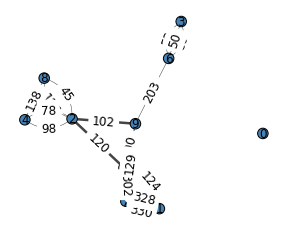

In [52]:
#plot the graph

g.es['width'] = 0.5
g.es[results[0]]['width'] = 2.5

ax = plt.subplot()
ig.plot(
         g,
         target = ax,
         
         vertex_color = 'steelblue',
         vertex_label = range(g.vcount()),
         edge_width=g.es['width'],
         edge_label=g.es["weight"],
         edge_align_label = True,
         edge_background = 'white')


plt.show()

# Communities

In [53]:
import igraph as ig
import matplotlib.pyplot as plt

In [55]:
# Edge betweenness is a standard way to detect commuoties

communities = g.community_edge_betweenness()
communities = communities.as_clustering()

In [56]:
# Next we color each vertex and edge based on its community membership

num_communities = len(communities)
palette = ig.RainbowPalette(n = num_communities)
for i,community in enumerate(communities):
    g.vs[community]["color"] = i
    community_edges = g.es.select(_within = community)
    community_edges["color"] = i

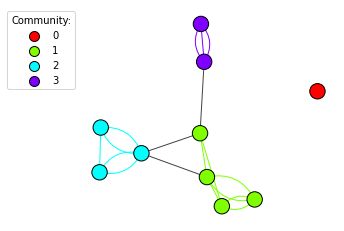

In [57]:
#Plot the graph
fig, ax = plt.subplots()
ig.plot(
         communities,
         palette = palette,
         edge_width = 1,
         target = ax,
         vertex_size =0.3,

)
# Create a custom color legend
legend_handles = []
for i in range(num_communities):
    handle = ax.scatter(
        [], [],
        s=100,
        facecolor=palette.get(i),
        edgecolor="k",
        label=i,
    )
    legend_handles.append(handle)
ax.legend(
    handles=legend_handles,
    title='Community:',
    bbox_to_anchor=(0, 1.0),
    bbox_transform=ax.transAxes,
)
plt.show()